<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_03_NLP%EA%B8%B0%EC%B4%88_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.03 NLP기초 - 순환 신경망
---

* 날짜: 2022-07-15
* 이름: 김민규


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - RNN
    - LSTM
    - GRU

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 714 (delta 176), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (714/714), 38.09 MiB | 29.71 MiB/s, done.
Resolving deltas: 100% (369/369), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

## imdb 베이스 모델
---

### **| imdb 데이터 처리**
```
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)
```

In [3]:
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000, 256) (25000, 256)


### **| FCN with GlobalAveragePooling1D**

Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 256, 32)           320000    
                                                                 
 global_average_pooling1d_1   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 320,257
Trainable params: 320,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 6ms/step - loss: 0.6930 - acc: 0.5076 - val_loss: 0.6925 - 

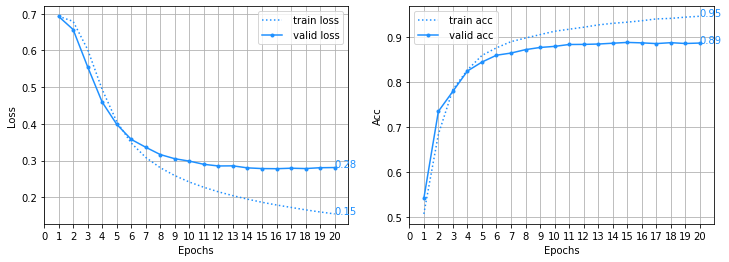

In [5]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GlobalAveragePooling1D(data_format = 'channels_first')(y)
y = layers.Dense(1, activation='sigmoid')(y)
model = models.Model(x,y, name='FCNwithGAP')
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

## RNN
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image6_f6vds6.png width=800>
</p>

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 256, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 40s 249ms/step - loss: 0.6919 - acc: 0.5145 - val_loss: 0.6930 - val_acc: 0.5234
Epoch 2/5
157/157 [==============================] - 40

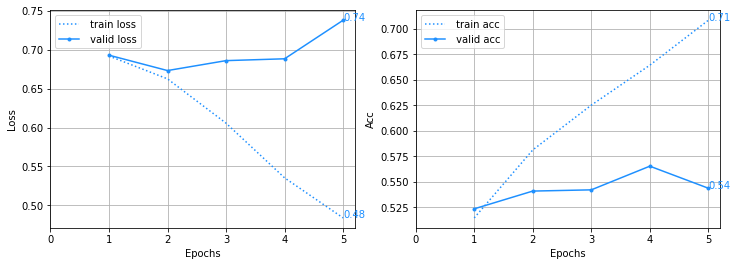

In [7]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.SimpleRNN(32)(y)
y = layers.Dense(1, activation='sigmoid')(y)
model = models.Model(x,y, name='RNN')
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

## LSTM
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image3_nsnxp3.png width=600>
</p>



Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 256, 32)           320000    
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 21ms/step - loss: 0.6797 - acc: 0.5620 - val_loss: 0.5780 - val_acc: 0.7198
Epoch 2/20
157/157 [==============================] - 3

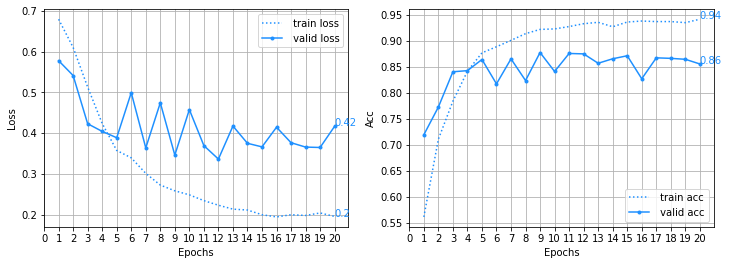

In [14]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32)(y)
y = layers.Dense(1, activation='sigmoid')(y)
model = models.Model(x,y, name='LSTM')
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 256, 32)           320000    
                                                                 
 lstm_9 (LSTM)               (None, 256, 32)           8320      
                                                                 
 lstm_10 (LSTM)              (None, 32)                8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 8s

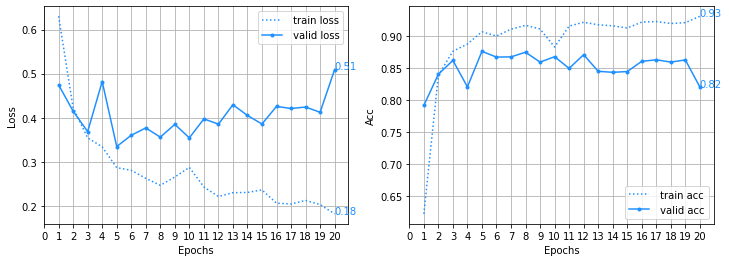

In [17]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32, return_sequences=True)(y) # 2차 텐서가 출력된다. (Many-To-Many)
y = layers.LSTM(32, return_sequences=False)(y) # 1차 텐서가 출력됩니다. (Many-To-One)
y = layers.Dense(1, activation='sigmoid')(y) # 1차 텐서만 입력받을 수 있다.
model = models.Model(x,y, name='LSTM')
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


## GRU
---


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image10_zgefie.png width=600>
</p>



Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 256, 32)           320000    
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 4s 17ms/step - loss: 0.6999 - acc: 0.5337 - val_loss: 0.6619 - val_acc: 0.5720
Epoch 2/20
157/157 [==============================] - 2s

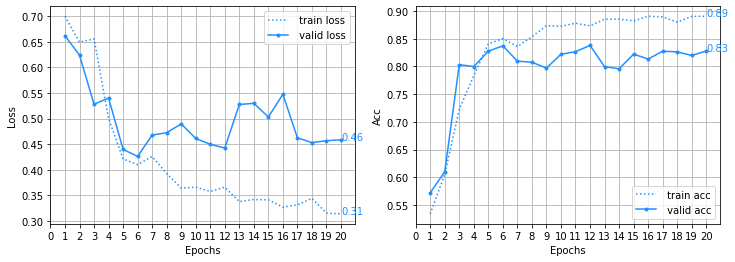

In [19]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GRU(32)(y) # 2차 텐서가 출력된다. (Many-To-Many)
y = layers.Dense(1, activation='sigmoid')(y) # 1차 텐서만 입력받을 수 있다.
model = models.Model(x,y, name='GRU')
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


# 6.2 - Understanding recurrent neural networks

In [21]:
import keras
keras.__version__

'2.8.0'

In [22]:
# 케라스의 순환 층
from keras.layers import SimpleRNN

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [25]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # 맨 위 층만 마지맏 출력을 반환합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
max_len = 500 # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다.)
batch_size=32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [31]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 500ms/step - loss: 0.6552 - acc: 0.5997 - val_loss: 0.5184 - val_acc: 0.7870
Epoch 2/10
157/157 [==============================] - 73s 463ms/step - loss: 0.4042 - acc: 0.8296 - val_loss: 0.3874 - val_acc: 0.8354
Epoch 3/10
157/157 [==============================] - 76s 484ms/step - loss: 0.3157 - acc: 0.8755 - val_loss: 0.3650 - val_acc: 0.8436
Epoch 4/10
157/157 [==============================] - 77s 493ms/step - loss: 0.2330 - acc: 0.9125 - val_loss: 0.3711 - val_acc: 0.8522
Epoch 5/10
157/157 [==============================] - 72s 461ms/step - loss: 0.1763 - acc: 0.9363 - val_loss: 0.4463 - val_acc: 0.8020
Epoch 6/10
157/157 [==============================] - 72s 459ms/step - loss: 0.1233 - acc: 0.9576 - val_loss: 0.4329 - val_acc: 0.8484
Epoch 7/10
157/157 [==============================] - 74s 474ms/step - loss: 0.0878 - acc: 0.9718 - val_loss: 0.4508 - val_acc: 0.8400
Epoch 8/10
157/157 [==============================] - 7

In [32]:
import matplotlib.pyplot as plt

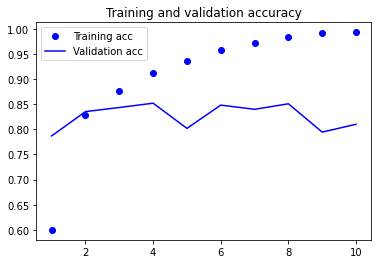

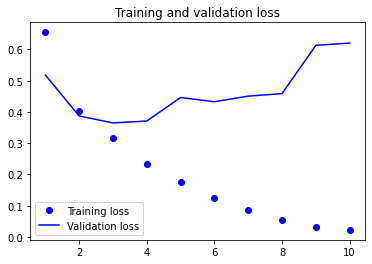

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 케라스를 사용한 LSTM

In [34]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 24ms/step - loss: 0.4967 - acc: 0.7635 - val_loss: 0.3387 - val_acc: 0.8610
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2844 - acc: 0.8899 - val_loss: 0.2916 - val_acc: 0.8824
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2289 - acc: 0.9130 - val_loss: 0.2864 - val_acc: 0.8812
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1950 - acc: 0.9296 - val_loss: 0.2842 - val_acc: 0.8820
Epoch 5/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1766 - acc: 0.9352 - val_loss: 0.3345 - val_acc: 0.8758
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1564 - acc: 0.9439 - val_loss: 0.3085 - val_acc: 0.8882
Epoch 7/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1388 - acc: 0.9514 - val_loss: 0.3195 - val_acc: 0.8786
Epoch 8/10
157/157 [==============================] - 3s 20ms/step - 

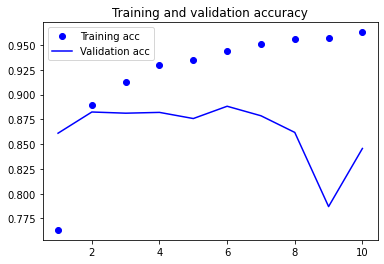

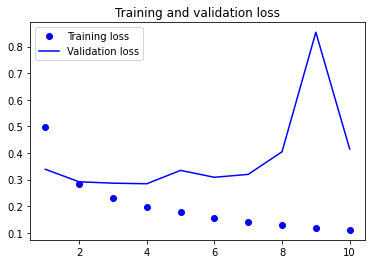

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()